<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

<br><br>
## <strong>1 금융 시계열 데이터
1. 금융 데이터 수집하기
1. 테이블 결측치 처리하기
1. 정규화 처리하기

<br>
### **01 시계열 데이터 수집하기**
! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade
1. https://github.com/pydata/pandas-datareader


In [1]:
# %matplotlib inline

# from pandas_datareader import get_data_yahoo

# samsung = get_data_yahoo('005930.KS', '2017-01', '2018-01')
# samsung.Close.plot()

In [2]:
# samsung.head()

In [3]:
# samsung['2017-07'].head()

In [4]:
# from pandas_datareader import get_data_yahoo

# start_date = '2013-01-01' 
# #startdate를 1996년으로 설정해두면 가장 오래된 데이터부터 전부 가져올 수 있다.

# codes = ['GM', 'KO', '005930.KS', '031510.KQ']

# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)
# prices.head(3)

In [5]:
# prices.to_csv('./data/stock_data.csv', encoding='ms949')
# print('done')

In [6]:
# # 이 부분은 약 1분의 시간으로 고민을 한 뒤에 따라하도록 한다
# import pandas as pd
# import numpy as np
# prices = pd.read_csv('./data/stock_data.csv', encoding='ms949')
# prices = prices.set_index('Date')
# prices.index = pd.DatetimeIndex(prices.index)
# prices.info()

<br>
## ** 6 다양한 금융 데이터 생성하기**
https://wikidocs.net/3396
Bollinger Bands 

In [7]:
# from pandas_datareader import get_data_yahoo
# price_temp = get_data_yahoo('000660.KS', '2015-01-01')
# price_temp.to_csv('./data/stock-rolling.csv')

In [8]:
import pandas as pd
import numpy as np
price_temp = pd.read_csv('./data/stock-rolling.csv')
price_temp = price_temp.set_index('Date')
price_temp.index = pd.DatetimeIndex(price_temp.index)
price_temp = price_temp['2017':]
price_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 347 entries, 2017-01-02 to 2018-06-07
Data columns (total 6 columns):
High         347 non-null float64
Low          347 non-null float64
Open         347 non-null float64
Close        347 non-null float64
Volume       347 non-null float64
Adj Close    347 non-null float64
dtypes: float64(6)
memory usage: 19.0 KB


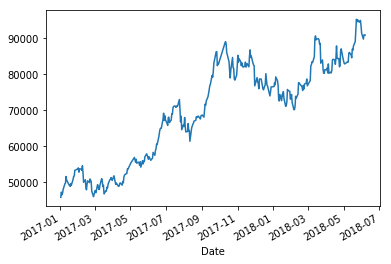

In [9]:
%matplotlib inline
price_temp.Close.plot()

<br>
### **01 Stochastic Oscillator** 
[Python Code](https://wikidocs.net/3396) | [개념 바로가기](https://steemkr.com/kr/@phuzion7/stochastic-and-bitcoin)

1. **주어진 기간 중** 움직인 가격 범위에서 **당일의 종가**가 **상대적으로 어디에 위치**하고 있는지를 알려주는 지표이다 
1. 이 지표는 추세가 없는 시장에서 잘 적용되는 지표 중의 하나이다 
1. 반면에 추세국면에서는 미세한 되돌림에도 지표가 큰 폭으로 방향을 바꾸기 때문에 잘 들어맞지 않는 단점이 있다

<img src="https://steemitimages.com/0x0/https://res.cloudinary.com/hpiynhbhq/image/upload/v1518173308/pvfv1igte4mcb9k8xzny.png" align="left">

In [10]:
# 현재 종가를 비교할 기간범위를 설정
n = 14 

In [11]:
# 매 기간의 종가를 고유한 측정값으로 변환한다
sz = len(price_temp['Close'])
sz

347

In [12]:
tempSto_K = []
i = 100  # sz 범위값중 임의의 값을 지정

# n 비교범위보다 넓은 값부터 계산을 시작
if i >= n-1 :
    # 현재 종가와 구간중 최저값과 차이 (분자값)
    tempUp   = price_temp['Close'][i] - min(price_temp['Low'][i-n+1:i+1])
    # 구간내 OHLC 중 최대 최소가격의 차이 (분모값)
    tempDown = max(price_temp['High'][i-n+1:i+1]) -  min(price_temp['Low'][i-n+1:i+1])
    tempSto_K.append( tempUp / tempDown )
else:
    # n보다 작은 초기값은 0 설정
    tempSto_K.append(0) 
tempSto_K

[0.6666666666666666]

In [13]:
# 함수로 정리
def fnStoch(df, n=14): # price: 종가(시간 오름차순), n: 기간
    sz = len(df['Close'])
    tempSto_K = []
    for i in range(sz):
        if i >= n-1:
            tempUp   = df['Close'][i] - min(df['Low'][i-n+1:i+1])
            tempDown = max(df['High'][i-n+1:i+1]) -  min(df['Low'][i-n+1:i+1])
            tempSto_K.append( tempUp / tempDown )
        else:
            tempSto_K.append(0) # n보다 작은 초기값은 0 설정
    df['Sto_K']     = pd.Series(tempSto_K,  index=df.index)
    df['Sto_D']     = pd.Series(df['Sto_K'].rolling(3).mean())
    df['Sto_SlowD'] = pd.Series(df['Sto_D'].rolling(3).mean())
    return df

In [14]:
price_ = fnStoch(price_temp)
price_.head(3)

,High,Low,Open,Close,Volume,Adj Close,Sto_K,Sto_D,Sto_SlowD
Date,,,,,,,,,
2017-01-02,46000.0,44600.0,44750.0,45800.0,1547681.0,45181.082031,0.0,NaN,NaN
2017-01-03,47300.0,46200.0,46200.0,47250.0,2655477.0,46611.488281,0.0,NaN,NaN
2017-01-04,47150.0,46200.0,47000.0,46500.0,2722599.0,45871.621094,0.0,0.0,NaN


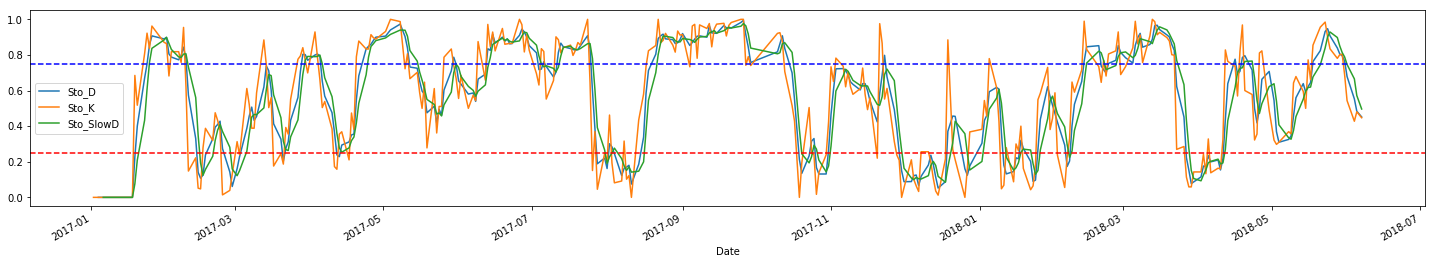

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(25,4))
price_.Sto_D.plot()
price_.Sto_K.plot()
price_.Sto_SlowD.plot()
plt.legend()
# price_.Sto_SlowD.plot()
plt.axhline(y = 0.25, linestyle = '--', color = 'red')
plt.axhline(y = 0.75, linestyle = '--', color = 'blue')

## 결과의 해석
1. 파란선을 넘으면 과매수 구간 : 매도신호
1. 빨간선을 넘의면 과매도 구간 : 매수신호

<br>
### **02 RSI(Relative Strength Index; 상대강도지수)** 
[Python Code](https://wikidocs.net/3399) | [개념 바로가기](https://steemkr.com/kr/@phuzion7/eos-rsi)

1. **가격의 상승압력**과 **하락압력**간의 상대적인 강도를 판단한다
1. **일정한 비교기간**의 가격에 비해 **상승한 변화량**과 **하락한 변화량**의 **평균값**을 구하여, 
1. 상승한 변화량이 크면 과매수(매도시점)로, 하락한 변화량이 크면 과매도로(매수시점) 판단하는 방식

In [16]:
# 현재 추세강도를 백분율로 나타내어 언제 주가가 Turn Around 될것인가를 예측한다
# 웰레스 윌더(Welles Wilder)는 기준일을 14일을 권장한다
# Divergence 분석방법으로, 머리어꺠형 삼각형패턴형을 보일때 추세전환을 예측하기 용이하다

## Series.shift(n) : n번 다음 인덱스에 존재하는 값을 추출한다
## Series.diff(n) : n번 다음 인덱스값과 현재 인덱스 값의 차이값을 추출한다

In [17]:
import numpy as np
import pandas as pd
data = [ i  for i in range(1, 100, 2)]
data = pd.Series(data)
data.diff(1)[:10]

0    NaN
1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
dtype: float64

In [18]:
data.shift(1)[:10]

0     NaN
1     1.0
2     3.0
3     5.0
4     7.0
5     9.0
6    11.0
7    13.0
8    15.0
9    17.0
dtype: float64

In [19]:
# Numpy Array 결과물로 저장된다
# Up-Price (상승분) : 전날에 비해 상승한경우, 종가를 입력
U = np.where(price_temp.Close.diff(1) > 0, price_temp.Close.diff(1), 0)
# Down-Price (하락분) : 전날에 비해 하락한 경우, 종가-1을 입력
D = np.where(price_temp.Close.diff(1) < 0, price_temp.Close.diff(1) *(-1), 0)

In [20]:
# 상승한 내용의 이동평균을 계산한다
AU = pd.Series(U).rolling( window = 3, min_periods = 3 ).mean()
# 하락한 내용의 이동평균을 계산한다
AD = pd.Series(D).rolling( window = 3, min_periods = 3 ).mean()

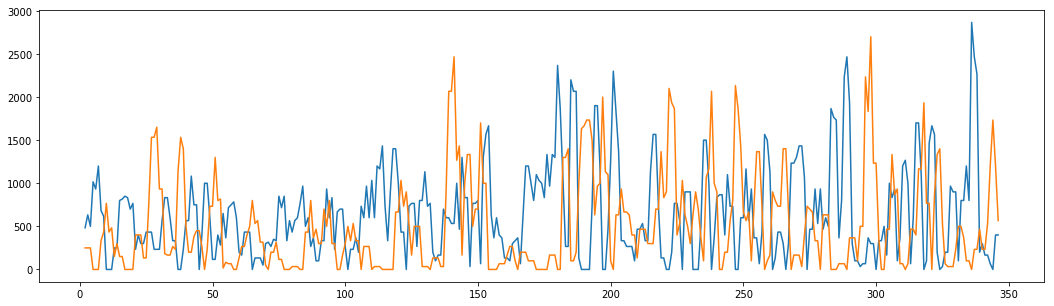

In [21]:
AU.plot(figsize=(18,5))
AD.plot()

<br>
## **Series.div(데이터프레임)**
동일한 인덱스 컬럼 데이터들의 **평균**을 0~1 로 정규화 한다

In [22]:
data = [ i  for i in range(1, 5) ]
data = pd.Series(data)
data.div(data*5)

0    0.2
1    0.2
2    0.2
3    0.2
dtype: float64

In [23]:
RSI = AU.div(AD + AU) * 1
RSI[:5]

0         NaN
1         NaN
2    0.659091
3    0.716981
4    0.666667
dtype: float64

In [24]:
RSI.max()

1.0

In [25]:
RSI.min()

0.0

In [26]:
# RSI(Relative Strength Index; 상대강도지수)
def fnRSI(m_Df, m_N):    
    import numpy as np
    import pandas as pd

    U = np.where(m_Df.diff(1) > 0, m_Df.diff(1), 0)
    D = np.where(m_Df.diff(1) < 0, m_Df.diff(1) *(-1), 0)

    AU = pd.Series(U).rolling( window=m_N, min_periods=m_N ).mean()
    AD = pd.Series(D).rolling( window=m_N, min_periods=m_N ).mean()
    RSI = AU.div(AD + AU) * 100
    RSI.index = m_Df.index
    return RSI

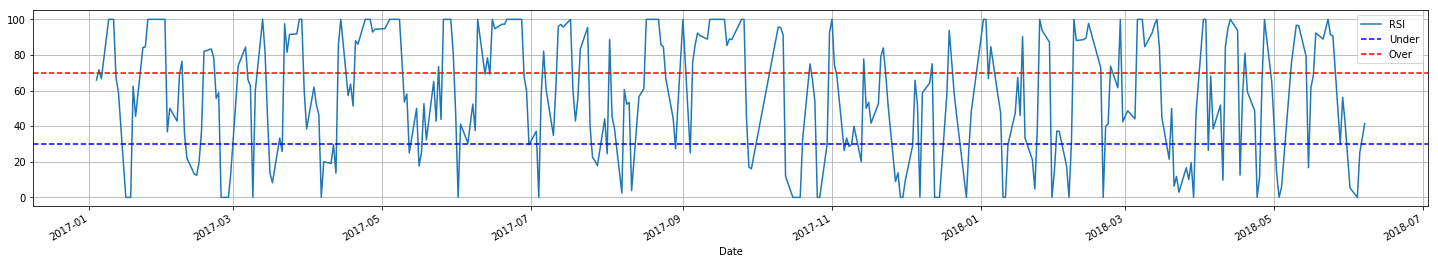

In [27]:
price_RSI = fnRSI(price_temp.Close, 3)
price_RSI.plot(figsize=(25,4), label='RSI') #, color='black')
plt.axhline(y = 30, linestyle = '--', color = 'blue', label = 'Under')  # 과매도 구간
plt.axhline(y = 70, linestyle = '--', color = 'red',  label = 'Over')   # 괘매수 구간
plt.grid()
plt.legend()

<br>
### **03 볼린저 밴드 데이터 그리기**
Bollinger Bands 
1. 주가는 이동평균선을 중심으로 일정한 가격범위를 잘 벗어나지 않는다는 전제에서 시작
1. 중간 : 20일 이동평균선
1. 상하 : 이동평균선 2배를 증가 감소한 범위 구간을 설정
1. 정규표준분포의 경우 95%가 해당 범위내 존재하므로 5%를 제외한 대부분의 경우를 해석 가능하다

1. 횡보장의 경우 폭이좁고, 추세장의 경우 폭이 넓어진다
1. 주가는 일정한 패턴을 반복하므로 횡보장이 긴경우에는 추세장이 다가올 징조로 판단 가능하다
1. 폭이 좁으면 매수구간, 폭이 넓으면 매도구간

In [28]:
def fnBolingerBand(m_DF, n=20, k=2):
    m_DF['20d_ma']    = m_DF['Close'].rolling(n).mean()
    m_DF['Bol_upper'] = m_DF['Close'].rolling(n).mean() +  k * m_DF['Close'].rolling(n, min_periods=n).std()
    m_DF['Bol_lower'] = m_DF['Close'].rolling(n).mean() -  k * m_DF['Close'].rolling(n, min_periods=n).std()
    return m_DF

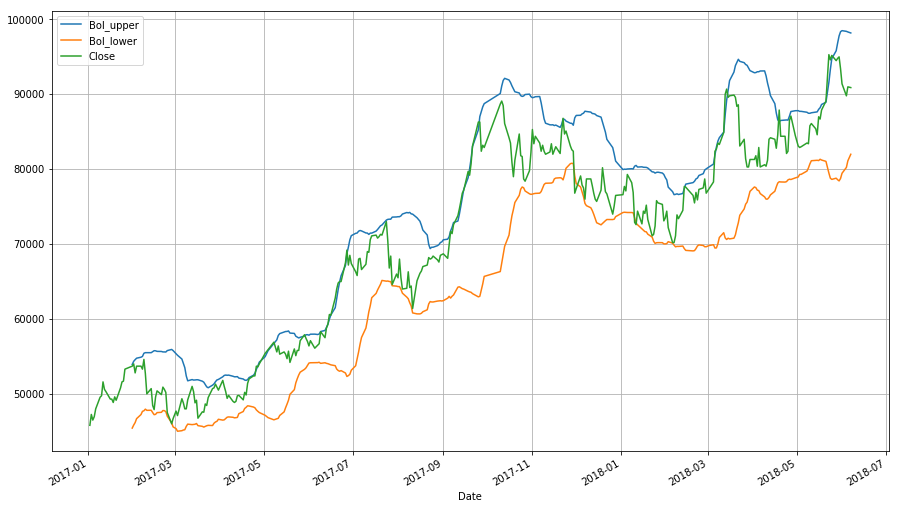

In [29]:
import warnings
warnings.filterwarnings("ignore")

price_2017    = price_temp
price_df_boli = fnBolingerBand(price_2017)
plt.figure(figsize = (15,9))
price_df_boli.Bol_upper.plot()
price_df_boli.Bol_lower.plot()
price_df_boli.Close.plot()
plt.legend()
plt.grid()
plt.show()

In [30]:
price_df_boli.head()

,High,Low,Open,Close,Volume,Adj Close,Sto_K,Sto_D,Sto_SlowD,20d_ma,Bol_upper,Bol_lower
Date,,,,,,,,,,,,
2017-01-02,46000.0,44600.0,44750.0,45800.0,1547681.0,45181.082031,0.0,NaN,NaN,NaN,NaN,NaN
2017-01-03,47300.0,46200.0,46200.0,47250.0,2655477.0,46611.488281,0.0,NaN,NaN,NaN,NaN,NaN
2017-01-04,47150.0,46200.0,47000.0,46500.0,2722599.0,45871.621094,0.0,0.0,NaN,NaN,NaN,NaN
2017-01-05,47500.0,46850.0,47000.0,46950.0,2377163.0,46315.539062,0.0,0.0,NaN,NaN,NaN,NaN
2017-01-06,48450.0,47600.0,47700.0,48000.0,3166843.0,47351.351562,0.0,0.0,0.0,NaN,NaN,NaN


In [31]:
## Quiz 분석 : 간격을 계산한 추가 선을 만들어 보기

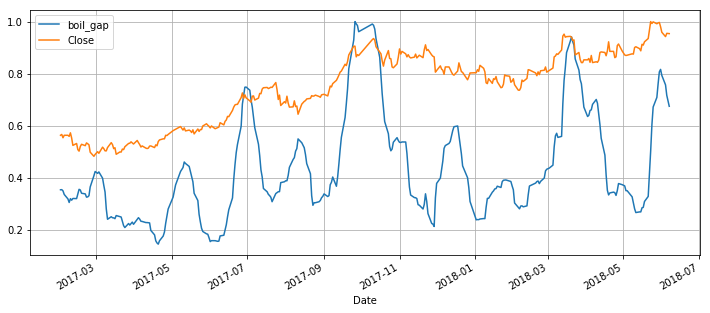

In [32]:
boli_gap    = price_df_boli.Bol_upper - price_df_boli.Bol_lower
boil_gap_df = pd.concat([boli_gap, price_df_boli.Close], axis=1)
boil_gap_df.columns = ['boil_gap', 'Close']
boil_gap_df = boil_gap_df.dropna()

(boil_gap_df.boil_gap /  max(boil_gap_df.boil_gap)).plot(figsize=(12,5), grid=True)
(boil_gap_df.Close    /  max(boil_gap_df.Close)).plot(grid=True)
plt.legend()

In [33]:
## 해석
# 폭이 좁으면 : 매수구간
# 폭이 넓으면 : 매도구간

<br>
### **04 MACD(moving average convergence/divergence)** 
[Python Code](https://wikidocs.net/3397) | 지수 이평선의 차분 데이터의 시각화로 일반적으로 MACD(12, 26, 9)가 많이 사용됩니다. 

이동평균의 종류 [Blog 정리](https://medium.com/@igniter.yoo/%EA%B8%B0%EC%88%A0%EC%A0%81-%EB%B6%84%EC%84%9D%EC%9D%98-%EA%B8%B0%EC%B4%88-basics-of-technical-analysis-10-%EC%9D%B4%EB%8F%99-%ED%8F%89%EA%B7%A0-46b0d8ddf576)
1. 단순 이동평균 (Simple Moving Average, SMA) : 단순히 주어진 기간 동안의 지난 종가들을 모두 합해서 계산에 쓰이는 가격들의 개수로 나누는 것
1. 선형 가중평균 (Linear Weighted Average)
1. 지수 이동평균 (Exponential Moving Average, EMA) : 단순 이동 평균보다 새로운 정보에 더 민감

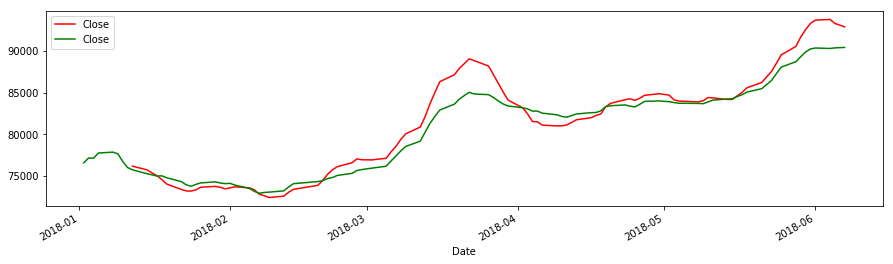

In [34]:
# 이걸 스스로 생각하도록 유도해보자
price_temp.Close['2018'].rolling(9).mean().plot(figsize=(15,4), color="red")
price_temp.Close['2018'].ewm(9).mean().plot(color='green')
plt.legend()

In [35]:
# MACD = EMA(numFast) - EMA(numSlow)
# EMA(Exponential Moving Average ; 지수이동평균)
def fnMACD(m_Df, m_NumFast=12, m_NumSlow=26, m_NumSignal=9):
    m_Df['EMAFast']    = m_Df['Close'].rolling( window = m_NumFast, min_periods = m_NumFast - 1).mean()
    m_Df['EMASlow']    = m_Df['Close'].rolling( window = m_NumSlow, min_periods = m_NumSlow - 1).mean()
    m_Df['MACD']       = m_Df['EMAFast'] - m_Df['EMASlow']
    m_Df['MACDSignal'] = m_Df['MACD'].ewm( span = m_NumSignal, min_periods = m_NumSignal-1).mean()
    m_Df['MACDDiff']   = m_Df['MACD']    - m_Df['MACDSignal']
    return m_Df

In [36]:
price_fnMACD = fnMACD(price_temp)
price_fnMACD.tail(3)

,High,Low,Open,Close,Volume,Adj Close,Sto_K,Sto_D,Sto_SlowD,20d_ma,Bol_upper,Bol_lower,EMAFast,EMASlow,MACD,MACDSignal,MACDDiff
Date,,,,,,,,,,,,,,,,,
2018-06-04,92400.0,89700.0,91000.0,89800.0,3141036.0,89800.0,0.427536,0.553140,0.665531,89325.0,98410.760983,80239.239017,92308.333333,88192.307692,4116.025641,3096.726069,1019.299572
2018-06-05,91300.0,89800.0,89800.0,91000.0,2758383.0,91000.0,0.480620,0.483878,0.571921,89725.0,98329.986315,81120.013685,92666.666667,88523.076923,4143.589744,3306.098804,837.490940
2018-06-07,92700.0,90600.0,92700.0,90900.0,2748437.0,90900.0,0.447154,0.451770,0.496263,90095.0,98194.506158,81995.493842,92916.666667,88692.307692,4224.358974,3489.750838,734.608137


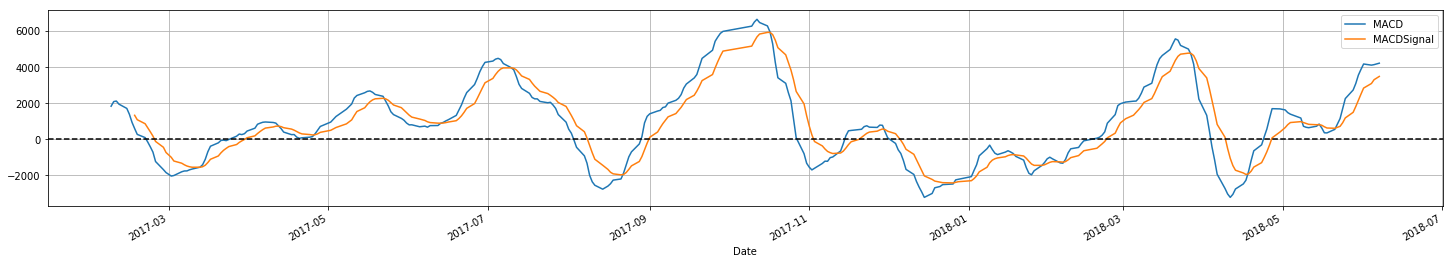

In [37]:
plt.figure(figsize=(25,4))
price_fnMACD.MACD.plot()
price_fnMACD.MACDSignal.plot()
# price_fnMACD.MACDRolling.plot()
# price_fnMACD.MACDDiff.plot()
plt.axhline(y = 0, linestyle = '--', color = 'k')  # 과매도 구간
plt.grid(); plt.legend(); plt.show()